# Credits

This notebook has been heavily inspired by the excellent video "Seq. 07 / Pytorch" from the FIDLE training (formation FIDLE) : <br> https://www.youtube.com/watch?v=brktdGzMHN8 <br> We highly encourage you to go watch this video after the Programming Practical if you want to deepen your knowledge about Pytorch ! &#128521;

In [7]:
import torch
import torch.nn as nn
print("Pytorch version is", torch.__version__)

import matplotlib.pyplot as plt
import numpy as np

Pytorch version is 2.0.1


# Pytorch tensors

Tensors behave kind of like numpy arrays, except that they can be used to propagate a gradient and can be easily transfered to a GPU (but we won't use that last property in this PP) !

In [8]:
torch.tensor([[1, 2],[-3,-4]])

tensor([[ 1,  2],
        [-3, -4]])

You can easily precise the type of the variables in your tensor

In [9]:
torch.zeros([3,5], dtype = torch.float32)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

And you can also easily access the data it contains !

In [10]:
A = torch.tensor([[1, 2],[-3,-4]])
print(A[0,1])
print(A[0,1].item())

tensor(2)
2


For convenience, tensors can also be converted to numpy arrays (such as when you want to use matplotlib for example)

In [11]:
A.numpy()

array([[ 1,  2],
       [-3, -4]])

You can also transpose tensors, with torch.transpose(tensor, first_dim_to_transpose, second_dim_to_transpose). You can also use .T, but be careful with the dimensions if you are in more than 2D !

In [12]:
A = torch.randn([3,4,5])
print(A)
print(A.shape)
A_t = torch.transpose(A,0,1)
print(A_t.shape)
A_t = torch.transpose(A,0,2)
print(A_t.shape)
print(A.T.shape)

tensor([[[-1.7348, -0.4245,  0.3135,  0.0877, -0.0783],
         [ 0.1877, -1.7412, -0.7307,  2.2954, -0.0262],
         [-1.8764, -0.5731, -0.1795,  1.4833,  1.3218],
         [-1.2476,  0.9540,  0.9955, -1.6935,  0.6797]],

        [[-1.1423,  0.3526,  0.9385, -1.2204, -0.6719],
         [-1.1618,  0.3420, -1.3936, -0.0159,  0.0984],
         [-0.7527, -0.6162,  0.6502,  0.1482, -0.4863],
         [-0.1039,  1.1409,  1.7229, -0.0959, -2.3704]],

        [[ 0.4487, -0.9642,  0.9674, -0.3882, -0.6755],
         [ 0.1678, -0.5654,  0.8144,  0.7813,  0.4421],
         [-0.8727,  1.2135, -0.5249, -0.9932, -0.8638],
         [-1.1823,  0.0454,  1.9976,  0.1435,  0.5484]]])
torch.Size([3, 4, 5])
torch.Size([4, 3, 5])
torch.Size([5, 4, 3])
torch.Size([5, 4, 3])


/tmp/ipykernel_17071/134619327.py:8: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /croot/pytorch_1686931851744/work/aten/src/ATen/native/TensorShape.cpp:3571.)
  print(A.T.shape)


You can reshape the tensors with view() and flatten()

In [13]:
A = torch.randint(0,5,[3,4])
print(A)
print(A.view([6,2]))
print(A.view([-1, 1]))
print(A.flatten())

tensor([[1, 4, 2, 0],
        [2, 2, 2, 2],
        [2, 4, 1, 1]])
tensor([[1, 4],
        [2, 0],
        [2, 2],
        [2, 2],
        [2, 4],
        [1, 1]])
tensor([[1],
        [4],
        [2],
        [0],
        [2],
        [2],
        [2],
        [2],
        [2],
        [4],
        [1],
        [1]])
tensor([1, 4, 2, 0, 2, 2, 2, 2, 2, 4, 1, 1])


You can concatenate tensors in several ways, but be careful with the dimensions !

In [14]:
A = torch.randn([3, 3])
B = torch.randn([5, 3])

print(torch.vstack((A,B)))
print(torch.hstack((A, B.T)))

tensor([[-0.2362, -0.0264, -0.1052],
        [ 0.0229,  1.2815, -0.8277],
        [ 0.7314,  0.1033,  1.5014],
        [-2.8946,  0.5053, -0.0305],
        [ 0.6402,  0.1420,  0.5119],
        [ 1.0816, -0.3225,  0.2777],
        [ 0.2590,  1.3378, -1.4131],
        [ 0.5935, -0.5766, -0.2086]])
tensor([[-0.2362, -0.0264, -0.1052, -2.8946,  0.6402,  1.0816,  0.2590,  0.5935],
        [ 0.0229,  1.2815, -0.8277,  0.5053,  0.1420, -0.3225,  1.3378, -0.5766],
        [ 0.7314,  0.1033,  1.5014, -0.0305,  0.5119,  0.2777, -1.4131, -0.2086]])


# Linear algebra with Pytorch

You can perform basic linear algebra operations with tensors ! Let's begin with norm calculation

In [15]:
x = torch.randn(5)
print(x)
print(torch.norm(x, p = 2)) #2-norm
print(torch.norm(x, p = 1)) #1-norm
print(torch.norm(x, p = float('inf'))) #inf-norm

tensor([ 1.0628, -0.1339, -0.0709,  0.9066, -0.1807])
tensor(1.4167)
tensor(2.3549)
tensor(1.0628)


You can also perform dot products (inner and outer)

In [16]:
y = torch.randn(5)
print(torch.dot(x, y))
print(torch.inner(x, y))
print(torch.outer(x, y))

tensor(1.2790)
tensor(1.2790)
tensor([[ 0.5240, -1.5764, -1.6342,  0.8084,  1.4249],
        [-0.0660,  0.1986,  0.2058, -0.1018, -0.1795],
        [-0.0350,  0.1052,  0.1091, -0.0540, -0.0951],
        [ 0.4470, -1.3447, -1.3940,  0.6895,  1.2155],
        [-0.0891,  0.2680,  0.2779, -0.1374, -0.2423]])


But be careful, the * corresponds to elementwise product !

In [17]:
print(x*y)

tensor([ 0.5240,  0.1986,  0.1091,  0.6895, -0.2423])


Of course, you can perform matrix multiplication as well !

In [18]:
A = torch.randn(5, 5)
B = torch.randn(5, 2)

print(torch.matmul(A, B))
print(A @ B)

tensor([[ 1.8559e+00, -8.5173e-01],
        [-1.5886e+00,  1.1535e+00],
        [ 1.4595e+00,  3.6546e+00],
        [ 2.4761e-04, -2.6120e+00],
        [-1.4641e+00,  4.2675e+00]])
tensor([[ 1.8559e+00, -8.5173e-01],
        [-1.5886e+00,  1.1535e+00],
        [ 1.4595e+00,  3.6546e+00],
        [ 2.4761e-04, -2.6120e+00],
        [-1.4641e+00,  4.2675e+00]])


# Automatic differentiation with Pytorch

Now the main advantage of Pytorch tensors, automatic differentiation ! Automatic differentiation refers to a set of techniques to evaluate the partial derivative of a function specified by a computer program. In our case, the program is a Neural Network. To use automatic differentiation in Pytorch, you have to use the requires_grad = True argument when you create your tensor. Make sure your tensor is a tensor of floats ! Gradients can only be required for floats or complexs tensors.

In [19]:
x = torch.tensor(4., requires_grad = True)
y = torch.tensor(2.)
z = x*y

print(x.requires_grad)
print(y.requires_grad)
print(z.requires_grad)

y.requires_grad = True

print(y.requires_grad)

True
False
True
True


When you create a tensor directly, Pytorch calls it a leaf tensor (or leaf node), but if you create a tensor by composing other tensors, it becomes a non-leaf tensor. 

In [20]:
print(x.is_leaf)
print(y.is_leaf)
print(z.is_leaf)

True
True
False


The gradient is stocked in the .grad argument of the tensor. For the moment, the gradient is None because no backpropagation/backward operation has been done. 

In [21]:
print(x.grad)
print(y.grad)
print(z.grad)

None
None
None


/tmp/ipykernel_17071/2090960413.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /croot/pytorch_1686931851744/work/build/aten/src/ATen/core/TensorBody.h:486.)
  print(z.grad)


Be careful ! If you want to track the gradient of a non-leaf tensor, you have to use the .retain_grad() method after creating the tensor. 

In [22]:
z.retain_grad()
print(z.grad)

None


To populate the gradient argument, you have to perform a backward pass with the .backward() method on the function you want to calculate the gradient of (here the function output is called loss). The .backward() method will run through every variables that were involved in the evaluation of the function (here x and y but not z) and will populate their .grad argument with the gradient of the function with respect to that variable. If you want to backawrd through the graph multiple times (needed for PINNs), you have to add the reatin_graph = True argument, otherwise the graph values will be discarded after each backward pass for memory issues. 

In [23]:
loss = x**2 + y**2
loss.backward(retain_graph = True)

print(loss)
print(x.grad)
print(y.grad)
print(z.grad)

tensor(20., grad_fn=<AddBackward0>)
tensor(8.)
tensor(4.)
None


CAREFUL : if you call .backward() several times without zeroing the gradients in between, the gradients will accumulate in the .grad argument of the variables. Zeroing the gradients is done with a simple command when using an optimizer, as we will see later. 

You can also use the no_grad() function if you want to perform operations for which you don't want Pytorch to trace the gradient.

In [24]:
with torch.no_grad():
    loss = x**2 + y**2

print(loss) # The grad_fn=<AddBackward0> argument which was visible before is now gone.
    
# loss.backward(retain_graph = True) # Uncommenting this line will produce a RuntimeError. Try it once then comment the line again. 

tensor(20.)


You can also use the autograd.grad() function, which will also run through every variables needed to perform the evaluation of the function, as the .backward() method, but it will concatenate the different components to get the gradient vector at the end. The syntax of autograd.grad() is (function_to_calculate_the_gradient_of, variables_to_calculate_the_gradient_from). Since the autograd.grad function returns a tuple of tensors, you need to precise [0] to take only the first value of the tuple, which is the gradient we are interested in.

In [25]:
parameters = torch.hstack((x,y))
loss = parameters[0]**2 + parameters[1]**2

gradient = torch.autograd.grad(loss, parameters)[0]
print(gradient)

tensor([8., 4.])


If you want to calculate higher orders derivatives (needed for PINNs), you need to specify create_graph = True as well !

In [26]:
parameters = torch.hstack((x,y))
loss = parameters[0]**2 + parameters[1]**2

gradient = torch.autograd.grad(loss, parameters,
                               retain_graph = True,
                               create_graph = True)[0]

Hessian = torch.zeros(gradient.shape[0], gradient.shape[0])
for i in range (gradient.shape[0]):
    Hessian[:, i] = torch.autograd.grad(gradient[i], parameters,
                                        retain_graph = True)[0].flatten()
print(Hessian)

tensor([[2., 0.],
        [0., 2.]])


If you want to compute the gradient of a loss function evaluated at several points (used for PINNs), you have to precise the grad_outputs option to tell Pytorch the format in which you expect the gradient to be. Otherwise, Pytorch thinks you want to compute the full Jacobian matrix of the vector containing all the loss values with respect to the parameters, which is not the case. You need to inform Pytorch there is a one-to-one correspondance between each row of parameter and each compoennt of the loss, by setting grad_outputs = torch.ones_like(the vector containting the values of the evaluatiions of the function you want to compute the gradient of).

In [27]:
parameters = torch.vstack((torch.hstack((x,y)), 3*torch.hstack((x,y)), 2*torch.hstack((x,y))))
loss = torch.norm(parameters, p = 2, dim = 1)**2

gradient = torch.autograd.grad(loss, parameters,
                               grad_outputs = torch.ones_like(loss),
                               retain_graph = True,
                               create_graph = True)[0]

# Optimization with Pytorch

Optimizing with Pytorch is very easy ! As you will see, you only need to define an optimizer and then everything works fluently from that ! First let's define a basic function and a starting point.

In [28]:
list_xy = []

x = torch.tensor(-3., requires_grad = True)
y = torch.tensor(3., requires_grad = True)

def f(x, y):
    return (1-x)**2 + 100*(y-x**2)**2

Now let's define the optimizer ! Most PINNs use a deterministic gradient descent method like L-BFGS because stochastic gradient descent converges less precisely, thus leading in huge errors in the physical solution. Since PINNs are mainly used with relatively low number of colocation points, the computation of the full gradient is affordable.

In [29]:
optimizer = torch.optim.LBFGS([x, y], #Parameters on which the optimization is performed. 
                              lr = 1, #learning rate, useless when using Wolfe linear search
                              max_iter = 200, #maximum number of iterations, but not evaluations !
                              line_search_fn = 'strong_wolfe', #linear search algorithm
                              tolerance_grad = -1, #stopping criterion for the gradient, deactivated here
                              tolerance_change = -1) #stopping criterion for the loss stability, deactivated here

And now, the optimization ! First we define a closure() function which will be used to evaluate the function value and to backpropagate the gradients using the .backward() function. Next, just calling the .step(closure) method will apply the closure() function to evaluate the function, calculate its gradient and update the parameters accordingly as many times as needed until convergence criteria (or maximum number of iterations) are met.

In [30]:
def closure():
    optimizer.zero_grad() #In Pytorch, gradients are accumulated throughout the optimization, so it is important to zero them out before each iteration
    loss = f(x, y) #Loss evaluation
    loss.backward() #Gradients calculation and propagation
    list_xy.append([x.detach().clone().numpy(), y.detach().clone().numpy()]) #Let's store the trajectory !
    return loss

optimizer.step(closure) #With the .step(closure) function, the gradients calculated by .backward() are applied to each parameters !

print(list_xy[-1])

[array(1., dtype=float32), array(1., dtype=float32)]


Now, let's plot the results !

Text(0.5, 0, '$z$')

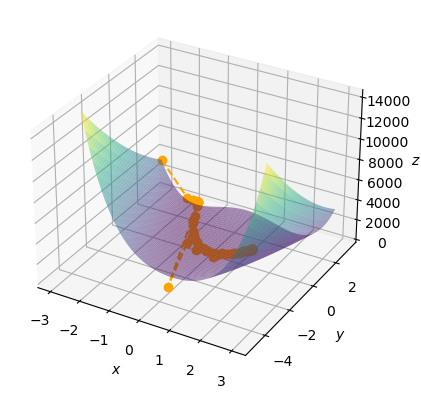

In [31]:
x_grid, y_grid = torch.meshgrid(torch.linspace(-3, 3, 100),
                                torch.linspace(-3, 3, 100), 
                                indexing = 'ij')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 
ax.plot_surface(x_grid, y_grid, f(x_grid, y_grid), cmap = 'viridis', alpha = 0.5)
ax.plot(np.asarray(list_xy)[:,0], np.asarray(list_xy)[:,1], 
           f(np.asarray(list_xy)[:,0], np.asarray(list_xy)[:,1]), 
            '--o', c = 'orange')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

PS : Don't worry about the huge spikes you see, they represent the evaluations of the L-BFGS algorithm ! There is no easy way to select only the iterations of the L-BFGS optimizer in Pytorch, but in the code provided with the PP the evaluations are filtered out and you will see only the iterations !

# Creating a Neural Network with Pytorch

In this section we will see how to create a Neural Network with Pytorch ! Don't worry, for the programming practical, the NN is almost already coded so you won't have to worry too much about having to construct it from scratch ! First, let's see how to create a basic NN with Sequential() ! The Linear() layers refers to affine transformation with dimension Linear(input_dim, output_dim) and the activation functions are very simple to introduce !

In [32]:
model = nn.Sequential(nn.Linear(1, 10),
                     nn.Tanh(),
                     nn.Linear(10, 30),
                     nn.Tanh(),
                     nn.Linear(30,1))

model

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Tanh()
  (2): Linear(in_features=10, out_features=30, bias=True)
  (3): Tanh()
  (4): Linear(in_features=30, out_features=1, bias=True)
)

Now if you want to define a Neural Network in a more customizable way, you can create a sub-class of the nn.Module class. The forward() method defines how to model acts on an input to create its output when you call model(). 

In [33]:
class NN(nn.Module):
    def __init__(self, layers):
        super().__init__()
        self.activation = nn.Tanh()
        self.layers = layers
        self.list_loss = []
        self.hidden = nn.ModuleList()
        for input_size, output_size in zip(self.layers, self.layers[1:]):
            self.hidden.append(nn.Linear(input_size, output_size))

    def forward(self, input):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                input = self.activation(linear_transform(input))
            else:
                output = linear_transform(input)
        return output

model = NN([1, 10, 31, 1])
model

NN(
  (activation): Tanh()
  (hidden): ModuleList(
    (0): Linear(in_features=1, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=31, bias=True)
    (2): Linear(in_features=31, out_features=1, bias=True)
  )
)

# Training a Neural Network with Pytorch (regression)

For the last section, let's now learn how to train your Neural Network ! For that, you just need to combine all the previous sections and define an optimizer to optimize the Neural Network parameters and minimize a given loss ! Let's see that on a basic 1D regression example. First, let's define the data !

In [34]:
N_data = 50
train_test_ratio = 0.8

N_train = int(train_test_ratio*N_data)
N_test = int((1-train_test_ratio)*N_data)

x = torch.linspace(0, 1, N_data).view(-1, 1)
y_exact = x**3 + - torch.exp(x) + 2 #The function we want to approximate
y_noisy = y_exact + 0.05 * torch.randn(N_data, 1)  #Let's add some noise

indices = torch.randperm(N_data)
x_train, y_train = x[indices[:N_train]], y_noisy[indices[:N_train]]
x_test, y_test = x[indices[N_train:]], y_noisy[indices[N_train:]]

Let's visualize our data !

Text(0, 0.5, 'y')

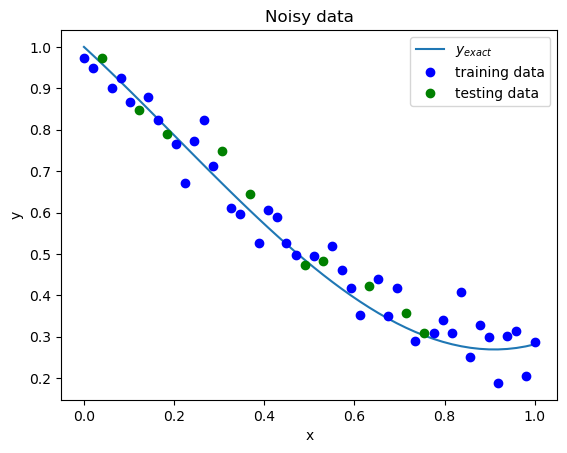

In [35]:
fig, ax = plt.subplots()
plt.plot(x.detach().clone().cpu().numpy(), 
         y_exact.detach().clone().cpu().numpy(), label = '$y_{exact}$')
plt.plot(x_train.detach().clone().cpu().numpy(), 
         y_train.detach().clone().cpu().numpy(), 'bo', label = 'training data')
plt.plot(x_test.detach().clone().cpu().numpy(), 
         y_test.detach().clone().cpu().numpy(), 'go', label = 'testing data')
plt.legend(loc = 'best')
plt.title('Noisy data')
plt.xlabel('x')
plt.ylabel('y')

Now we can define our Neural Network, as well as the optimizer and the loss...

In [36]:
model = NN([1, 20, 1])

optimizer = torch.optim.LBFGS(model.parameters(), #We want to optimize the NN parameters !
                              lr = 1, 
                              max_iter = 200, 
                              line_search_fn = 'strong_wolfe', 
                              tolerance_grad = -1, 
                              tolerance_change = -1) 

def loss(model, x_train, y_train):
    y_pred = model(x_train)
    return torch.norm(y_pred - y_train, p=2)**2 #Let's keep the usual 2-norm squared loss.

def closure():
    optimizer.zero_grad()
    l_train = 1/N_train*loss(model, x_train, y_train)
    l_train.backward()
    l_test = 1/N_test*loss(model, x_test, y_test)
    model.list_loss.append([l_train.detach().clone().cpu().numpy(),
                            l_test.detach().clone().cpu().numpy()]) #Let's store the losses value !
    if (len(model.list_loss)%50 == 0):
        print('iteration {:.0f} ongoing !'.format(len(model.list_loss)))
    return l_train

... and let's go for the training !

In [37]:
optimizer.step(closure)

iteration 50 ongoing !
iteration 100 ongoing !
iteration 150 ongoing !
iteration 200 ongoing !
iteration 250 ongoing !


tensor(0.1431, grad_fn=<MulBackward0>)

Now let's plot the results to understand how the training went. Can you see any issue with this setup ? Do you know how you could avoid it ?

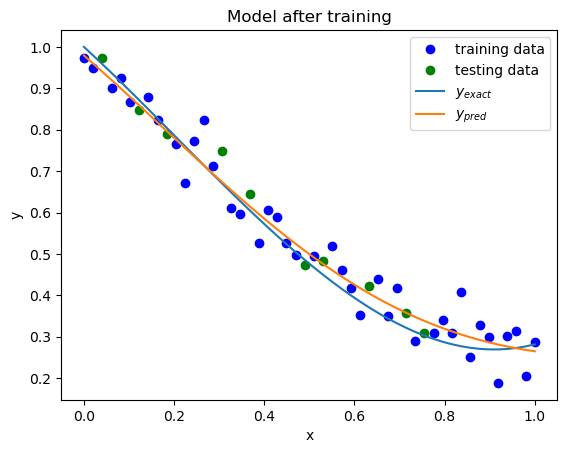

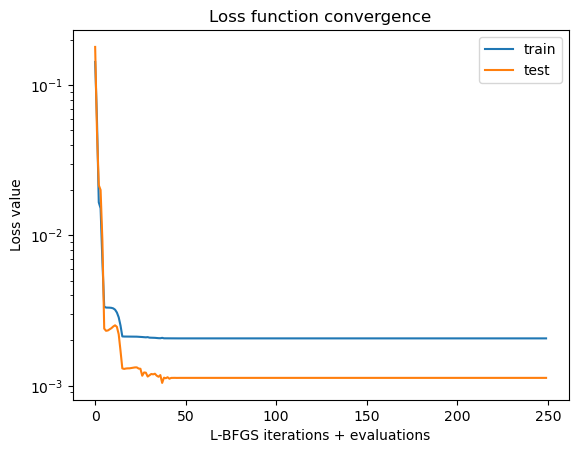

In [38]:
y_pred = model(x)

fig, ax = plt.subplots()
plt.plot(x_train.detach().clone().cpu().numpy(), 
         y_train.detach().clone().cpu().numpy(), 'bo', label = 'training data')
plt.plot(x_test.detach().clone().cpu().numpy(), 
         y_test.detach().clone().cpu().numpy(), 'go', label = 'testing data')
plt.plot(x.detach().clone().cpu().numpy(), 
         y_exact.detach().clone().cpu().numpy(), label = '$y_{exact}$')
plt.plot(x.detach().clone().cpu().numpy(), 
         y_pred.detach().clone().cpu().numpy(), label = '$y_{pred}$')
plt.legend(loc = 'best')
plt.title('Model after training')
plt.xlabel('x')
plt.ylabel('y')

fig, ax = plt.subplots()
array_loss = np.asarray(model.list_loss)
plt.plot(array_loss[:, 0], label = 'train')
plt.plot(array_loss[:, 1], label = 'test')
plt.title('Loss function convergence')
plt.xlabel('L-BFGS iterations + evaluations')
plt.ylabel('Loss value')
plt.yscale('log')
plt.legend(loc = 'best')

PS : Same thing as before for the spikes in the loss, they represent evaluations ! You won't have to worry about them in the code provided for the PP. 